###European Social Survey


In [0]:
# Loading the data...

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

ess = drive.CreateFile({'id':'1C12s1657FWcGcO4DlE0A4GnEDDhAuEFD'}) 
ess.GetContentFile('ess_combined_2012_2014.csv')  
ess = pd.read_csv('ess_combined_2012_2014.csv')



Did people become less trusting from 2012 to 2014? 

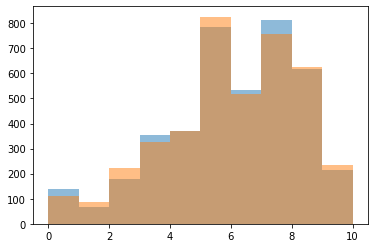

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)
Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)
(0.9520939588546753, 1.4426241793085802e-34)
(0.9580563902854919, 9.222525335052542e-33)


In [0]:
ess_12 = ess[ess.year == 6]
ess_14 = ess[ess.year == 7]

plt.hist(ess_12['ppltrst'], alpha = .5)
plt.hist(ess_14['ppltrst'], alpha = .5)
plt.show()

print(stats.describe(ess_12['ppltrst']))
print(stats.describe(ess_14['ppltrst']))
print(stats.ttest_ind(ess_12['ppltrst'], ess_14['ppltrst']))
print(stats.shapiro(ess_12['ppltrst']))
print(stats.shapiro(ess_14['ppltrst']))

FINDING: No, they didn't change much at all in their trust of each other. I chose to use an independent t-test to compare the 2012 and 2014 trust levels because the distributions were normally distributed as shown through the histogram, low skewness and kurtosis, and confirmed by the Shapiro-Wilk test.

In [0]:
plt.hist(ess_12['happy'], alpha = .5)
plt.hist(ess_14['happy'], alpha = .5)
plt.show()

print(stats.describe(ess_12['happy']))
print(stats.describe(ess_14['happy']))

print(stats.shapiro(ess_12['happy']))
print(stats.shapiro(ess_14['happy']))

print(stats.kruskal(ess_12['happy'], ess_14['happy']))
print(stats.mannwhitneyu(ess_12['happy'], ess_14['happy'], alternative='two-sided'))

FINDING: No, there was no sifnificant change in people's happiness from 2012 to 2014. Based on the histogram I was skeptical that the data sets were normal so I ran Shapiro-Wilk's test on them and found that they were not normally distributed. I then ran two non-parametric tests, the Kruskal and Mann-Whitney U. The Kruskal showed a small H but I wasn't sure if it was small enough. The Mann-Whitney U showed a huge U statistic, which I think means that the groups are very similar. 

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [0]:
print(ess_14['cntry'].unique())
cz_14 = ess_14[ess_14.cntry == 'CZ']
es_14 = ess_14[ess_14.cntry == 'ES']
se_14 = ess_14[ess_14.cntry == 'SE']

plt.hist(cz_14['sclmeet'], alpha = .5)
plt.hist(es_14['sclmeet'], alpha = .5)
plt.hist(se_14['sclmeet'], alpha = .5)
plt.show()

print(stats.describe(cz_14['sclmeet']))
print(stats.describe(es_14['sclmeet']))
print(stats.describe(se_14['sclmeet']))

print(stats.shapiro(cz_14['sclmeet']))
print(stats.shapiro(es_14['sclmeet']))
print(stats.shapiro(se_14['sclmeet']))

print(stats.kruskal(cz_14['sclmeet'], es_14['sclmeet'], se_14['sclmeet']))
print("Mood's median test result: {}".format(stats.median_test(cz_14['sclmeet'], es_14['sclmeet'], se_14['sclmeet'])))

All of the distributions appear non-normal, confirmed by the p-value of the Shapiro-Wilk test. Based on the Kruskal test's p-value we can conclude that the sets are not all aligned. Based on Mood's median test and an examination of the histograms we can see that a much larger propotion of the Czech Republic reported below-median on the social meetups score. 

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
plt.hist(cz_14['sclact'], alpha = .5)
plt.hist(es_14['sclact'], alpha = .5)
plt.hist(se_14['sclact'], alpha = .5)
plt.show()

print(stats.describe(cz_14['sclact']))
print(stats.describe(es_14['sclact']))
print(stats.describe(se_14['sclact']))

print(stats.f_oneway(cz_14['sclact'], es_14['sclact'], se_14['sclact']))

print(stats.ttest_ind(cz_14['sclact'], es_14['sclact']))
print(stats.ttest_ind(cz_14['sclact'], se_14['sclact']))
print(stats.ttest_ind(es_14['sclact'], se_14['sclact']))

NameError: ignored

The distributions appear normal and have low skewness and kurtosis. From the paired t-tests we can see that Czech Republic and Spain are the most similar and Spain and Sweden are the most disimilar. 

###Ruff Figural Fluency Test 

In [0]:
# Loading the data...

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

rfft = drive.CreateFile({'id':'1IIJBrBUXHmexnY2V-hycR5_wvT38W30h'}) 
rfft.GetContentFile('rfft.csv')  
rfft = pd.read_csv('rfft.csv')

Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

In [0]:
rfft_pivot_un = rfft.pivot(index='Casenr', columns='Measurement', values='Unique')
rfft_pivot_un2 = rfft_pivot_un['Measurement 2 (2006-2008)']
rfft_pivot_un3 = rfft_pivot_un['Measurement 3 (2008-2012)']
print(rfft_pivot_un2.describe())
print(rfft_pivot_un3.describe())
plt.hist(rfft_pivot_un['Measurement 2 (2006-2008)'], alpha = .5)
plt.hist(rfft_pivot_un['Measurement 3 (2008-2012)'], alpha = .5)
print(stats.ttest_rel(rfft_pivot_un2,rfft_pivot_un3))

The related t-test showed that there was an average of a 10 point increase in the unique score for each participant from Measurement 2 to Measurement 3.

Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?

In [0]:
rfft_pivot_pers = rfft.pivot(index='Casenr', columns='Measurement', values='Perseverative')
rfft_pivot_pers2 = rfft_pivot_pers['Measurement 2 (2006-2008)']
rfft_pivot_pers3 = rfft_pivot_pers['Measurement 3 (2008-2012)']
print(rfft_pivot_pers2.describe())
print(rfft_pivot_pers3.describe())
plt.hist(rfft_pivot_pers['Measurement 2 (2006-2008)'], alpha = .5)
plt.hist(rfft_pivot_pers['Measurement 3 (2008-2012)'], alpha = .5)
print(stats.wilcoxon(rfft_pivot_pers2-rfft_pivot_pers3))

Since the distribution was not normal but paired I used Wilcoxon and found that there was a significant difference between the perseverative erros of Measurement 2 and Measurement 3.